In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
marathon = pd.read_csv('../data/marathon/2013results.csv')
del marathon['state']
del marathon['city']
del marathon['genderdiv']
del marathon['division']
del marathon['name']
del marathon['bib']
del marathon['country']
del marathon['ctz']
del marathon['overall']

for c in marathon.columns:
    if c != 'gender':
        marathon[c] = marathon[c].apply(lambda val: float('nan') if val == '-' else val).apply(pd.to_numeric)
marathon = marathon.dropna()

__Kmeans ('Unsucessful Prediction')__

In [3]:
# Define the features and the outcome.
X = marathon.loc[:, marathon.columns != 'gender']
y = marathon['gender']

In [4]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y == 'F', 0, 1)

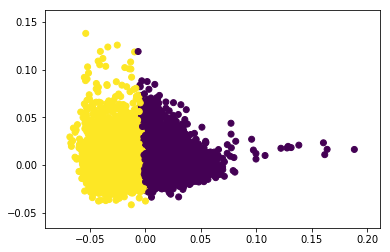

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      1896  6777
1      4550  2831


In [5]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [6]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0         3  6663
1      8670   718


In [7]:
sum(1 for i, j in zip(y, y_pred) if i != j)

11327

__Sample__

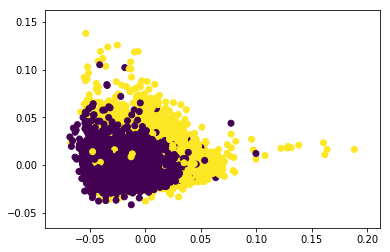

In [8]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.9,
    random_state=42)

__A. Mean Shift__

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.83, n_samples=100)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


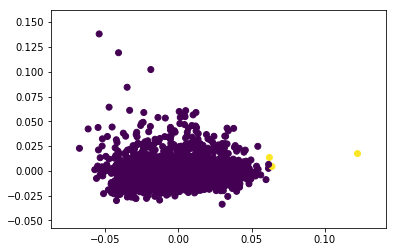

Comparing the assigned categories to the ones in the data:
col_0    0  1
row_0        
0      632  0
1      970  3


In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

__B. Spectral Clustering__

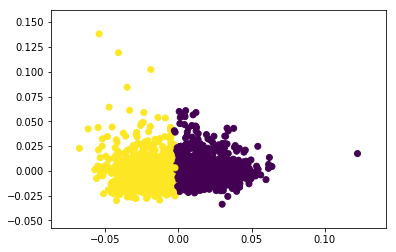

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      201  431
1      701  272


In [11]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [12]:
sum(1 for i, j in zip(y_train, predict) if i == j)

473

In [ ]:
test_pre

In [13]:
sum(1 for i, j in zip(y_test, ) if i == j)

KeyboardInterrupt: 